In [1]:
import random
import string
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import numpy.matlib as npmatlib
%matplotlib inline

from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

In [2]:
#load saved data (from lsda-demo.ipynb)
posteriors = np.load('readme/posteriors.npy')
priors = np.load('readme/priors.npy')
ref = np.squeeze(np.load('readme/ref.npy'))

#load saved data (from lsi-demo.ipynb)
inv_solutions = np.load('readme/inv_solutions_LSI.npy')

print(posteriors.shape)
print(priors.shape)
print(ref.shape)

print(inv_solutions.shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(28, 28)
(10000, 28, 28, 1)


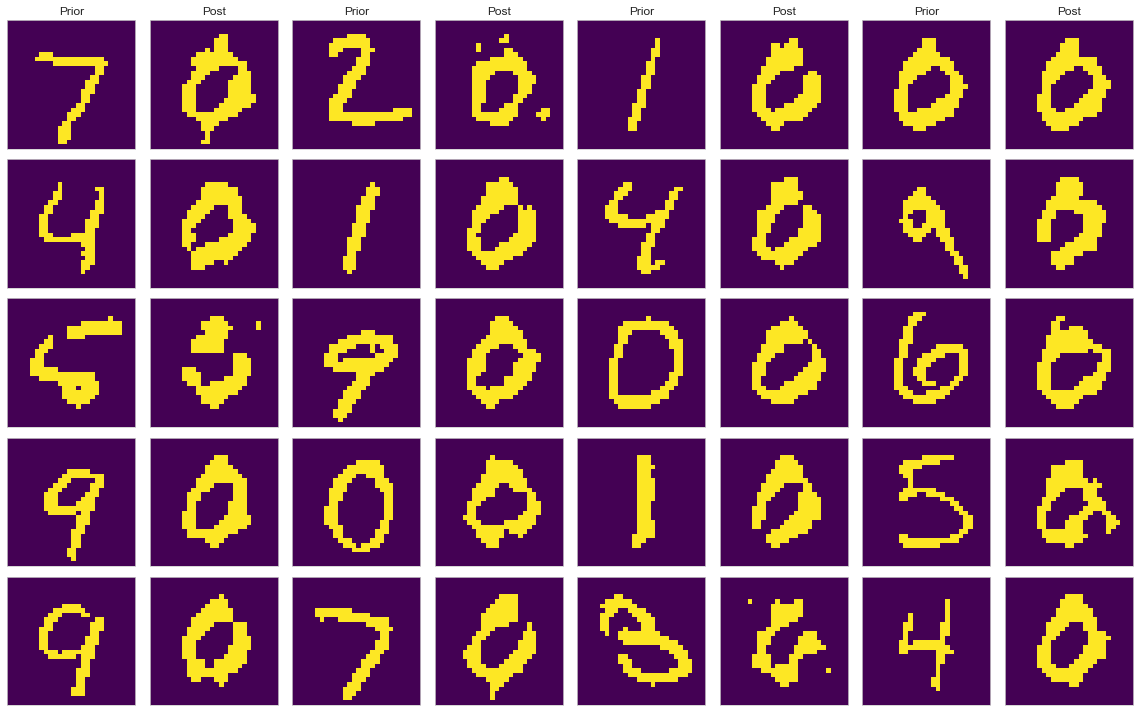

In [3]:
#view prior/posteriors
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
    
f = plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.grid(False)
    plt.xticks([]), plt.yticks([])
    plt.imshow(np.squeeze(priors[i]), cmap="viridis", vmin=0, vmax=1) 
    if i < 4:
        plt.title("Prior")
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.grid(False)
    plt.xticks([]), plt.yticks([])
    plt.imshow(np.squeeze(posteriors[i]), cmap="viridis", vmin=0, vmax=1)
    if i < 4:
        plt.title("Post")
    
plt.tight_layout()
plt.show()

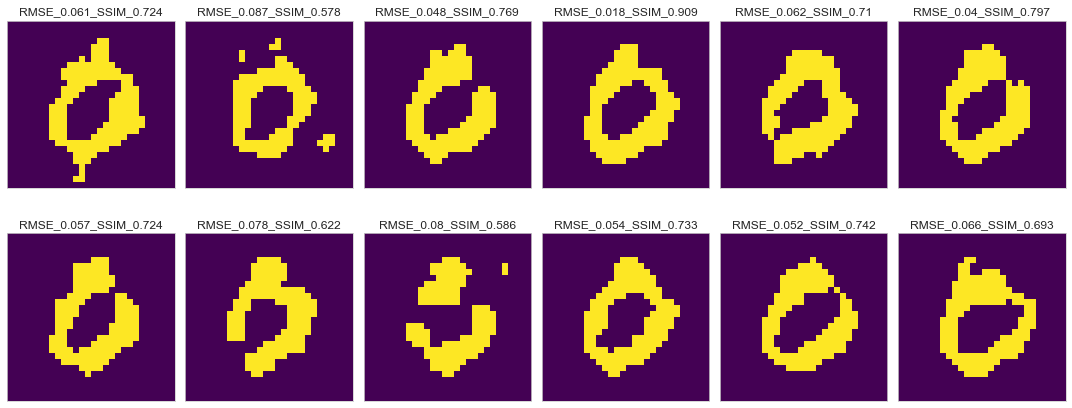

In [4]:
#view posteriors from LSDA
f = plt.figure(figsize=(15, 12))
for i in range(12):
    plt.subplot(4, 6, i+1)
    img = posteriors[i, :, :, 0]
    plt.imshow(img, cmap='viridis')
    plt.grid(False), plt.xticks([]), plt.yticks([])
    plt.title('RMSE_'+str(round(mean_squared_error(ref, img),3))+'_'+
         'SSIM_'+str(round(ssim(ref, img, data_range=img.max() - img.min()),3)))
plt.tight_layout()

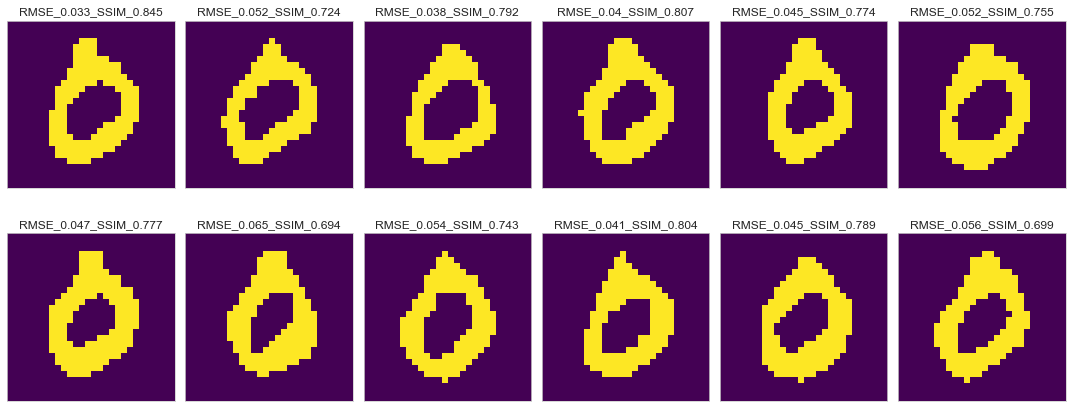

In [5]:
#view inversion solutions from LSI
f = plt.figure(figsize=(15, 12))
for i in range(12):
    plt.subplot(4, 6, i+1)
    img = inv_solutions[i, :, :, 0]
    plt.imshow(img, cmap='viridis')
    plt.grid(False), plt.xticks([]), plt.yticks([])
    plt.title('RMSE_'+str(round(mean_squared_error(ref, img),3))+'_'+
         'SSIM_'+str(round(ssim(ref, img, data_range=img.max() - img.min()),3)))
plt.tight_layout()

In [6]:
#mean and variance of prior and posterior (LSDA) to inversion solutions from LSI
def plotmvar(data1, data2, name=[]):
    f = plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(np.squeeze(data1), cmap="viridis", vmin=0, vmax=1, aspect='equal')
    plt.xticks([]), plt.yticks([])
    plt.title(name+"_$\mu$")

    plt.subplot(1, 2, 2)
    plt.imshow(np.squeeze(data2), cmap="viridis", vmin=0, vmax=0.25)
    plt.xticks([]), plt.yticks([])
    plt.title(name+"_$\sigma$")
    plt.tight_layout()

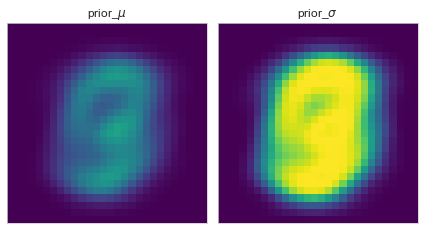

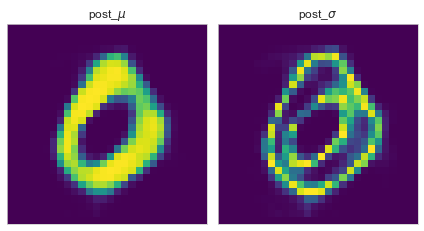

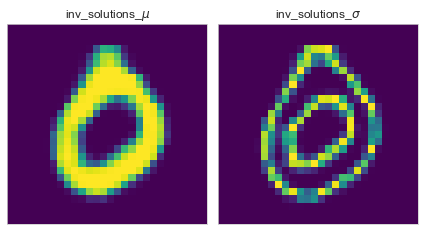

In [7]:
plotmvar(np.mean(priors, axis=0), np.var(priors, axis=0), name="prior")
plotmvar(np.mean(posteriors, axis=0), np.var(posteriors, axis=0), name="post")
plotmvar(np.mean(inv_solutions, axis=0), np.var(inv_solutions, axis=0), name="inv_solutions")

In [13]:
#calculate RMSE and SSIM scores
RMSE_LSDA = np.zeros(len(posteriors))
SSIM_LSDA = np.zeros(len(posteriors))

RMSE_LSI = np.zeros(len(inv_solutions))
SSIM_LSI = np.zeros(len(inv_solutions))

for i in range(len(posteriors)):
    img = posteriors[i, :, :, 0]
    RMSE_LSDA[i] = mean_squared_error(ref, img)
    SSIM_LSDA[i] = ssim(ref, img, data_range=img.max() - img.min())
    
    img = inv_solutions[i, :, :, 0]
    RMSE_LSI[i] = mean_squared_error(ref, img)
    SSIM_LSI[i] = ssim(ref, img, data_range=img.max() - img.min())

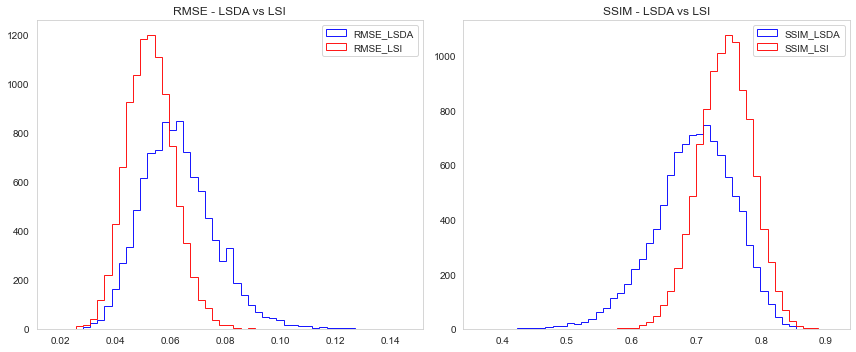

In [21]:
#compare distributions of SSIM values from LSDA and LSI
binmax = np.max(RMSE_LSDA)
binmin = np.min(RMSE_LSDA)
bbRMSE = np.linspace(binmin, binmax, 50)

binmax = np.max(SSIM_LSDA)
binmin = np.min(SSIM_LSDA)
bbSSIM = np.linspace(binmin, binmax, 50)

f = plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(RMSE_LSDA.flatten(), alpha=0.9, edgecolor='blue', histtype='step', bins=bbRMSE, density=False, label="RMSE_LSDA")
plt.hist(RMSE_LSI.flatten(), alpha=0.9, edgecolor='red', histtype='step', bins=bbRMSE, density=False, label="RMSE_LSI")
plt.grid(False)
plt.title('RMSE - LSDA vs LSI')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(SSIM_LSDA.flatten(), alpha=0.9, edgecolor='blue', histtype='step', bins=bbSSIM, density=False, label="SSIM_LSDA")
plt.hist(SSIM_LSI.flatten(), alpha=0.9, edgecolor='red', histtype='step', bins=bbSSIM, density=False, label="SSIM_LSI")
plt.grid(False)
plt.title('SSIM - LSDA vs LSI')
plt.legend()

f.tight_layout()